In [64]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [65]:
c0=1500
c1=1300
h=1  # half the distance between each receiver
x0=1
theta0=-20  # degrees of ray declination

In [66]:
# Snells law gives theta1
cT=c1*(np.cos(np.deg2rad(theta0))/c0)
theta1=np.sign(theta0)*np.rad2deg(np.arccos(cT))
#Compute absolute trave time with horizontal slowness
tReceive=x0*(1/c0)*np.cos(np.deg2rad(theta0))
#Compute relative travel time with vertical slownes
q0=(1/c0)*np.sin(np.deg2rad(theta0))
q1=(1/c1)*np.sin(np.deg2rad(theta1))

In [67]:
t1=tReceive-(q0+q1)*h
t1_noCurve=tReceive-2*q0*h

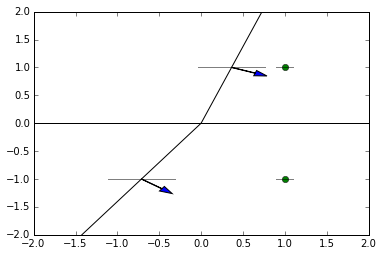

In [68]:
# Create a schematic of wave fronts and rays
plotZRange=2*h
plotXRange=2*x0
rayLength=0.3
tRefLen=0.4
rRefLen=0.1
ax=plt.axes()
#Interface
_=ax.plot([-plotZRange,plotZRange],[0,0],'k')
#Ray fronts are 90 degrees from rays
front0End=1/(np.tan(np.deg2rad(theta0+90))/plotZRange)
front1End=-1/(np.tan(np.deg2rad(theta1+90))/plotZRange)
_=ax.plot([0,front0End], [0,plotZRange],'k')
_=ax.plot([0,front1End], [0,-plotZRange],'k')
#Plot rays halfway up wave front

ray0Start=[1/(np.tan(np.deg2rad(theta0+90))/(plotZRange/2)), plotZRange/2]
ray1Start=[-1/(np.tan(np.deg2rad(theta1+90))/(plotZRange/2)), -plotZRange/2]

ray0L=rayLength*np.array([np.cos(np.radians(theta0)), np.sin(np.radians(theta0))])
ray1L=rayLength*np.array([np.cos(np.radians(theta1)), np.sin(np.radians(theta1))])

_=ax.arrow(ray0Start[0],ray0Start[1], ray0L[0], ray0L[1],width=0.005)
_=ax.arrow(ray1Start[0],ray1Start[1], ray1L[0], ray1L[1],width=0.005)

#Ray angle
_=ax.plot(ray0Start[0]+np.array([-tRefLen,tRefLen]),\
          [plotZRange/2,plotZRange/2],'k',alpha=0.5)
_=ax.plot(ray1Start[0]+np.array([-tRefLen,tRefLen]),\
          [-plotZRange/2,-plotZRange/2],'k',alpha=0.5)

#Receivers
_=ax.plot(x0, h, 'go')
_=ax.plot(x0, -h, 'go')
_=ax.plot(x0+np.array([-rRefLen,rRefLen]),\
          [x0,x0],'k',alpha=0.5)
_=ax.plot(x0+np.array([-rRefLen,rRefLen]),\
          [-x0,-x0],'k',alpha=0.5)

_=ax.set_xlim(-plotXRange,plotXRange)
_=ax.set_ylim(-plotZRange,plotZRange)